# Intialize

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
import os
import time




# the parameters needed for cosmology:
# use the last column of Planck 2018 (https://arxiv.org/pdf/1807.06209.pdf) Table 2
# TT,TE,EE+lowE+lensing+BAO
cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66, # use H0 because this is what is used by the emulators.
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665,

# 'k_pivot': 0.05,
# 'N_ncdm': 1,
# 'N_ur': 2.0328,
# 'm_ncdm': 0.06    

}



font = {'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

# # a simple conversion from cl's to dl's
# def l_to_dl(lp):
#     return lp*(lp+1.)/2./np.pi

2024-03-12 14:55:37.806513: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-03-12 14:55:37.806534: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-03-12 14:55:37.806538: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-03-12 14:55:37.806567: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-12 14:55:37.806588: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
%%time 
class_sz = Class()
class_sz.set(cosmo_params)
class_sz.set({
'output':'isw_tsz',
'ell_min': 2.,
'ell_max': 10000.,
'mass function': 'T08M500c', #"T08M500c" : Tinker et al at M500critical
'pressure profile': "A10",  # Arnaud et al 20120
})
class_sz.compute_class_szfast()

CPU times: user 3.56 s, sys: 262 ms, total: 3.82 s
Wall time: 832 ms


[]

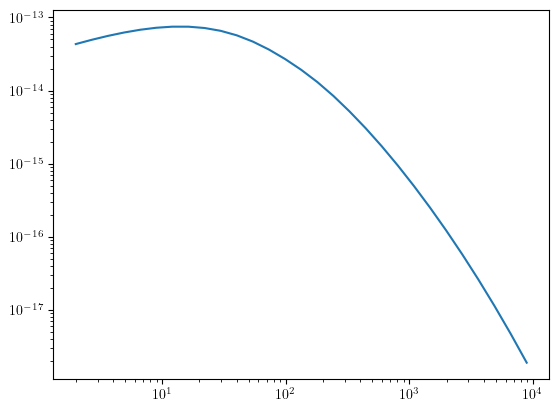

In [6]:
plt.plot(class_sz.dl_isw_sz()['ell'],class_sz.dl_isw_sz()['d_ell'])
plt.loglog()

## References

- https://arxiv.org/pdf/1606.00839.pdf
- https://arxiv.org/pdf/1807.07324.pdf